In [22]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import os

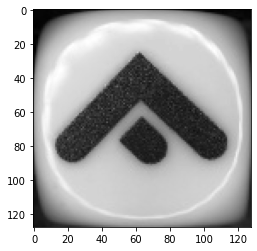

In [19]:
img = Image.open("assets/becode_dice_data/train_set/08/16_09_21_08_020.png")
plt.imshow(img, cmap="gray")

In [9]:
img = np.array(img)

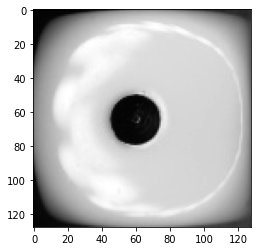

In [10]:
plt.imshow(img, cmap="gray")

In [11]:
img.shape

(128, 128)

In [14]:
print(img[0])

[  5   5   5   5   4   4   4   4   5   4   4   5   6   5   4   4   5   5
   5   6   8   5   4   7   5   7   6   6   7   7   7   9   7   9   9   9
  11  13  14  16  18  22  27  33  41  48  55  61  70  75  82  89  94  98
 102 106 110 112 115 117 119 120 121 121 125 125 125 126 126 127 127 128
 126 125 123 122 121 119 117 115 113 111 108 105 103 100  96  94  89  87
  83  78  74  69  63  60  60  56  53  53  51  45  42  42  44  43  41  39
  40  42  41  37  39  44  46  43  41  42  45  47  42  37  38  42  44  45
  46  46]


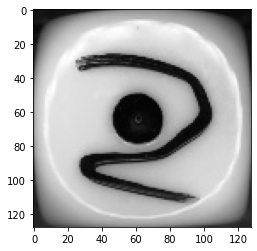

In [18]:
img = Image.open("assets/becode_dice_data/train_set/ano/17_11_21_anomalies_000.png")
plt.imshow(img, cmap="gray")

In [34]:
def create_dataset():
    directory = "assets/becode_dice_data/train_set/"
    data= []
    label= []
    for i in range(0, 10):
        for filename in os.listdir(directory+"0"+str(i)):
            img = Image.open(directory+"0"+str(i)+"/"+filename)
            data.append(np.array(img))
            label.append(i+1)
            if (len(data)%50==0):
                break
                
    print(len(data))
    return data, label
            
        

In [35]:
data, labels= create_dataset()

500


In [38]:
data[:10][1]

array([[81, 83, 83, ..., 39, 39, 39],
       [85, 85, 85, ..., 37, 38, 38],
       [89, 89, 87, ..., 36, 37, 39],
       ...,
       [28, 29, 31, ..., 67, 66, 65],
       [27, 29, 30, ..., 68, 68, 67],
       [26, 27, 28, ..., 67, 66, 66]], dtype=uint8)

In [39]:
data = np.array(data)
data.shape

(500, 128, 128)

In [41]:
preprocessed_data = data/255


In [46]:
import torch
from sklearn.model_selection import train_test_split

labels = np.array(labels)
# include number of channels for pytorch input (amount, channels, height, width)
preprocessed_data = np.expand_dims(preprocessed_data, axis=1)

# split data in train/val/test set
train_val_data, test_data, train_val_labels, test_labels = train_test_split(
    preprocessed_data, 
    labels,
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)

train_data, val_data, train_labels, val_labels = train_test_split(
    train_val_data, 
    train_val_labels,
    test_size=0.3, 
    random_state=42, 
    shuffle=True
)

In [47]:
import torch

# We select the GPU if we have one, else the CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Primary device is {str(device).upper()}")

# pytorch requires data of tensor format, not ndarrays
train_data = torch.tensor(train_data, dtype=torch.float32)
val_data = torch.tensor(val_data, dtype=torch.float32)
test_data = torch.tensor(test_data, dtype=torch.float32)

train_labels = torch.tensor(train_labels, dtype=torch.long)
val_labels = torch.tensor(val_labels, dtype=torch.long)
test_labels = torch.tensor(test_labels, dtype=torch.long)

Primary device is CPU


In [48]:
train_data

tensor([[[[0.0196, 0.0196, 0.0196,  ..., 0.1176, 0.1255, 0.1255],
          [0.0196, 0.0157, 0.0157,  ..., 0.1608, 0.1686, 0.1647],
          [0.0157, 0.0157, 0.0157,  ..., 0.1882, 0.1961, 0.1961],
          ...,
          [0.0314, 0.0314, 0.0314,  ..., 0.2039, 0.1961, 0.1843],
          [0.0275, 0.0353, 0.0353,  ..., 0.2000, 0.1922, 0.1843],
          [0.0314, 0.0392, 0.0353,  ..., 0.2078, 0.1961, 0.1843]]],


        [[[0.1294, 0.1294, 0.1333,  ..., 0.1294, 0.1255, 0.1216],
          [0.1294, 0.1333, 0.1412,  ..., 0.1333, 0.1294, 0.1255],
          [0.1255, 0.1294, 0.1412,  ..., 0.1333, 0.1333, 0.1294],
          ...,
          [0.2157, 0.2196, 0.2275,  ..., 0.2118, 0.2078, 0.2118],
          [0.2392, 0.2431, 0.2471,  ..., 0.2000, 0.2039, 0.2039],
          [0.2588, 0.2627, 0.2627,  ..., 0.1961, 0.2039, 0.2000]]],


        [[[0.0745, 0.0745, 0.0784,  ..., 0.2118, 0.2039, 0.2000],
          [0.0745, 0.0745, 0.0784,  ..., 0.2196, 0.2118, 0.1961],
          [0.0745, 0.0784, 0.0824,  ..

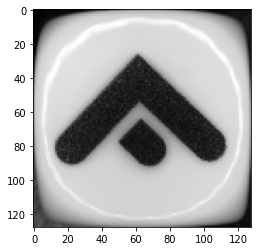

In [53]:
plt.imshow(preprocessed_data[400][0], cmap="gray")

In [60]:
import torch.nn as nn

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.convlayer = nn.Sequential(
        nn.Conv2d(2,2,2),
        nn.ReLU(),
        nn.MaxPool2d(2,2))
        
    def forward(self, x):
        logits = self.convlayer(x)
        return logits

In [62]:
model = ConvNet().to(device)
print(model)

ConvNet(
  (convlayer): Sequential(
    (0): Conv2d(2, 2, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)


In [63]:
logit= model(train_data)

RuntimeError: Given groups=1, weight of size [2, 2, 2, 2], expected input[280, 1, 128, 128] to have 2 channels, but got 1 channels instead